# 2値分類の例題
映画のレビュー文章を肯定的なレビューと否定的なレビューに分類する

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import imdb

np.random.seed(20201231)
tf.random.set_seed(20201231)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.3.1


# Memory setting if you use GPU 

In [2]:
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.8

# Load dataset

In [3]:
#データセットのロード(単語数は10000を上限にする)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
#評価データの作成
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_val.shape: ', x_val.shape)
print('y_val.shape: ', y_val.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

print('\nx_train')
print(x_train)

print('\ny_train')
print(y_train)
print(y_train.shape)

x_train.shape:  (15000,)
y_train.shape:  (15000,)
x_val.shape:  (10000,)
y_val.shape:  (10000,)
x_test.shape:  (25000,)
y_test.shape:  (25000,)

x_train
[list([1, 13, 104, 14, 9, 31, 7, 4, 4343, 7, 4, 3776, 3394, 2, 495, 103, 141, 87, 2048, 17, 76, 2, 44, 164, 525, 13, 197, 14, 16, 338, 4, 177, 16, 6118, 5253, 2, 2, 2, 21, 61, 1126, 2, 16, 15, 36, 4621, 19, 4, 2, 157, 5, 605, 46, 49, 7, 4, 297, 8, 276, 11, 4, 621, 837, 844, 10, 10, 25, 43, 92, 81, 2282, 5, 95, 947, 19, 4, 297, 806, 21, 15, 9, 43, 355, 13, 119, 49, 3636, 6951, 43, 40, 4, 375, 415, 21, 2, 92, 947, 19, 4, 2282, 1771, 14, 5, 106, 2, 1151, 48, 25, 181, 8, 67, 6, 530, 9089, 1253, 7, 4, 2])
 list([1, 14, 20, 16, 835, 835, 835, 51, 6, 1703, 56, 51, 6, 387, 180, 32, 812, 57, 2327, 6, 394, 437, 7, 676, 5, 58, 62, 24, 386, 12, 8, 61, 5301, 912, 37, 80, 106, 233])
 list([1, 86, 125, 13, 62, 40, 8, 213, 46, 15, 137, 13, 244, 24, 35, 2809, 4, 96, 4, 3100, 16, 2400, 80, 2384, 129, 1663, 4633, 4, 2, 115, 2085, 15, 2, 2, 165, 495, 9123

In [4]:
#データセット0番目の内容を文章に戻してみる
print('\nデータセット0番目の内容を文章に戻してみる')
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#0はパディング、1はシーケンスの開始、2が不明として予約されているため除外する
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
print(decoded_review)


データセット0番目の内容を文章に戻してみる
? i think this is one of the weakest of the kenneth branagh ? works after such great efforts as much ? about nothing etc i thought this was poor the cast was weaker alicia ? ? ? but my biggest ? was that they messed with the ? work and cut out some of the play to put in the musical dance sequences br br you just don't do shakespeare and then mess with the play sorry but that is just wrong i love some cole porter just like the next person but ? don't mess with the shakespeare skip this and watch ? books if you want to see a brilliant shakespearean adaptation of the ?


# Modify input data

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#ベクトル化
x_train = vectorize_sequences(x_train)
x_val = vectorize_sequences(x_val)
x_test = vectorize_sequences(x_test)
print('\nx_train')
print(x_train)

#既にOneHot化しているため方をfloatに変換する
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')
print('\ny_train')
print(y_train)


x_train
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

y_train
[0. 0. 0. ... 0. 1. 0.]


# Create deep learning layer

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Trainning

Epoch 1/5
30/30 [==============================] - 1s 36ms/step - loss: 0.5022 - accuracy: 0.7957 - val_loss: 0.3784 - val_accuracy: 0.8648
Epoch 2/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2987 - accuracy: 0.9021 - val_loss: 0.3036 - val_accuracy: 0.8864
Epoch 3/5
30/30 [==============================] - 1s 22ms/step - loss: 0.2183 - accuracy: 0.9286 - val_loss: 0.3015 - val_accuracy: 0.8779
Epoch 4/5
30/30 [==============================] - 1s 21ms/step - loss: 0.1719 - accuracy: 0.9442 - val_loss: 0.2825 - val_accuracy: 0.8873
Epoch 5/5
30/30 [==============================] - 1s 20ms/step - loss: 0.1413 - accuracy: 0.9537 - val_loss: 0.2897 - val_accuracy: 0.8848


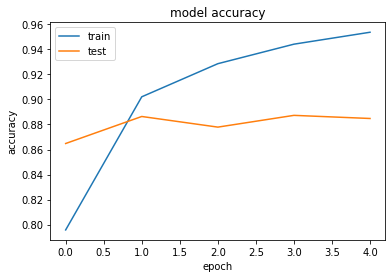

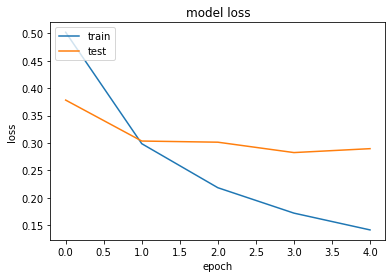

In [7]:
training = model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          batch_size=512,
          epochs=5)

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate

In [8]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3147 - accuracy: 0.8743


# Save the models

In [9]:
model.save('models\\bin_class.h5')
model.save('models\\bin_class_pb', save_format="tf")

print(model.input)
print(model.output)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models\bin_class_pb\assets
Tensor("dense_input:0", shape=(None, 10000), dtype=float32)
Tensor("dense_2/Sigmoid:0", shape=(None, 1), dtype=float32)
